# Project Business Statistics: E-news Express

## Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- Do the users spend more time on the new landing page than on the existing landing page?

- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

- Does the converted status depend on the preferred language?

- Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website

- group - Whether the user belongs to the first group (control) or the second group (treatment)

- landing_page - Whether the landing page is new or old

- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

- converted - Whether the user gets converted to a subscriber of the news portal or not

- language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Importing all the necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
# Giving Google Colab access to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the csv file from Drive into Colab using read.csv function
data = pd.read_csv('/content/drive/MyDrive/PG Data Science and Business Analysis/Project 2: E-news Express/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Displaying the first 5 rows of the data
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Displaying the last 5 rows of the dataset
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Looking at the shape of the dataset
data.shape

(100, 6)

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

In [ ]:
# Printing a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Changing the data type of user_id to a categorical value since Python interpreted it as numerical
data['user_id'] = pd.Categorical(data['user_id'])

In [ ]:
# Checking that data type have changed correctly
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    object  
 2   landing_page            100 non-null    object  
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    object  
 5   language_preferred      100 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 9.0+ KB


In [ ]:
# Checking for missing values in the dataset
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Looking at a statistical summary of the data that includes all columns
data.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.0,100,100,100.000000,100,100
unique,100.0,2,2,NaN,2,3
top,546443.0,control,old,NaN,yes,Spanish
freq,1.0,50,50,NaN,54,34
mean,NaN,NaN,NaN,5.377800,NaN,NaN
std,NaN,NaN,NaN,2.378166,NaN,NaN
min,NaN,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,NaN,3.880000,NaN,NaN
50%,NaN,NaN,NaN,5.415000,NaN,NaN
75%,NaN,NaN,NaN,7.022500,NaN,NaN


In [ ]:
# Checking what the 3 languages chosen are
data['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

**Observations:**
* The dataset has been loaded properly. It consists of a 100 rows and 6 columns as described in the Data Dictionary.
* Each column has information attributed to the user. User information is provided in rows.
* There are no duplicates in the dataset and no missing values as inferred from the summary and verified with isnull() function. All columns have 100 values input.
* There are 4 object type columns ('group', 'landing_page', 'converted', 'language_preferred'), 1 numerical/float ('time_spent_on_the_page'), and 1 categorical ('user_id').
* There are 50 control users and 50 treatment users. There are 50 users in the new landing page and 50 in the old landing page. As described in the objective, the users in the control group were served the old landing page and the users in the treatment group were served the new landing page.
* Spanish and French are the top languages with 34 users each.
* 54 users converted to subscribers.
* Users spend an average of 5.38 minutes on the landing page. The median is 5.41, since the mean and median are close in value we can infer that it is symmetrical distribution.

### Univariate Analysis

#### User_id

In [ ]:
# Checking that there is a singular user_id value for each entry
data['user_id'].nunique()

100

**Observations:**
* There are a 100 users in the dataset. User_id is an identifier for the users.

#### Group

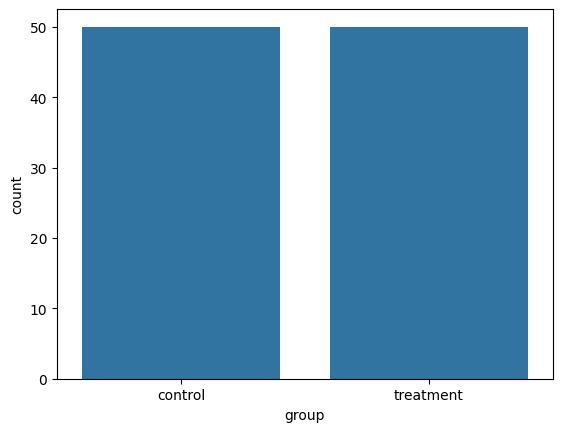

In [ ]:
# Visualizing the column group
sns.countplot(data=data,x='group');

In [ ]:
# Checking the amount of users in each group is the same
data['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

**Observations:**
* There are 2 groups as defined in the dictionary.
* There are 50 users in each group (control and treatment). The distribution is equally distributed.

#### Landing page

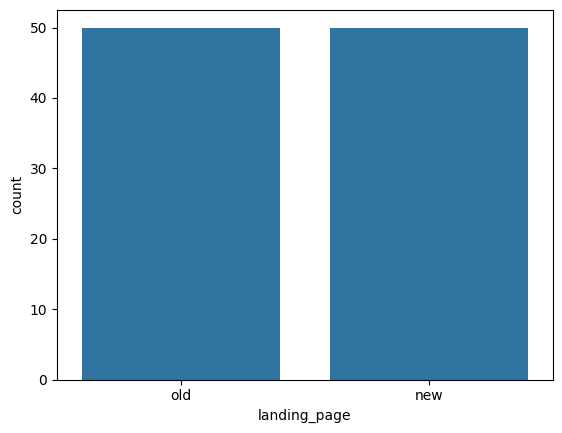

In [ ]:
# Visualizing landing page
sns.countplot(data=data,x='landing_page');

**Observations:**
* There are 2 unique values in landing_page (old and new).
* Each page has 50 users. Users in the old page belong to the control group and users in the new page belong to the treatment group.


#### Time spent on the page in minutes

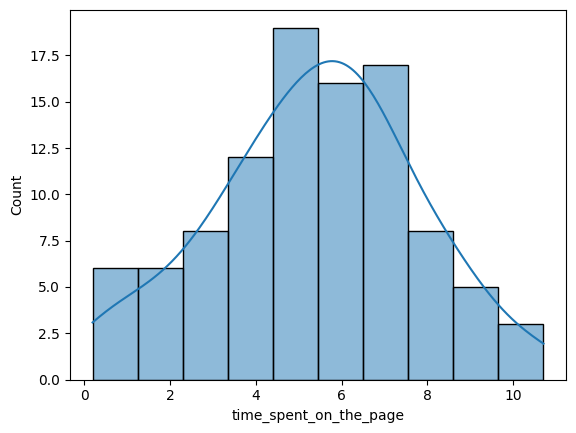

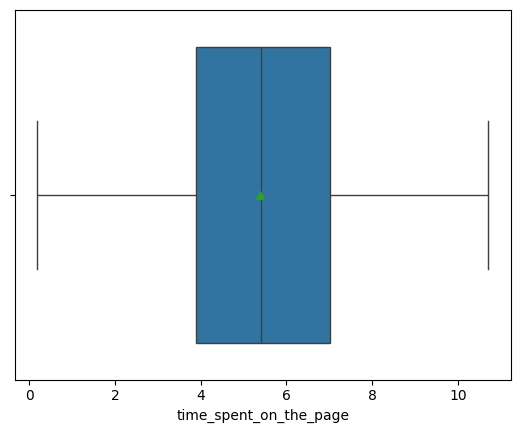

In [ ]:
# Visuals on numerical data for time spent on the page
sns.histplot(data=data,x='time_spent_on_the_page',bins=10,kde=True)
plt.show()
sns.boxplot(data=data,x='time_spent_on_the_page',showmeans=True)
plt.show()

**Observations:**
* The mean and median of time spent on the landing page are very close together. This indicates a symmetrical distribution that can be observed on the kde curve.
* The mode of the distribution shows that most users spend about 5 minutes on the page.
* 50% of the users spend between 4 and 7 minutes on the landing page.
* There are no outliers in the data. Few users spend 10 minutes or more on the page.

#### Converted

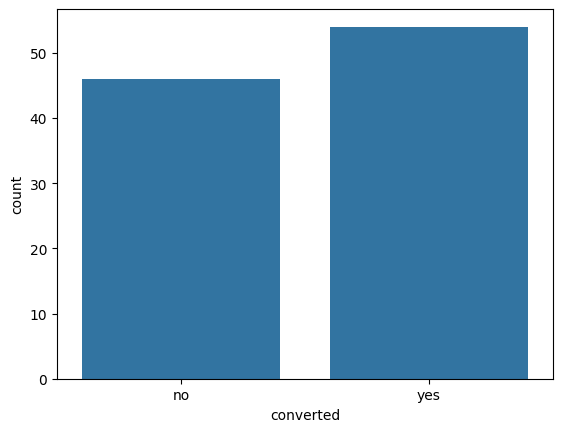

In [ ]:
# Visualizing converted users
sns.countplot(data=data,x='converted');

In [ ]:
# Looking at the percentages of users converted to subscribers
data.value_counts('converted',normalize=True)

converted
yes    0.54
no     0.46
Name: proportion, dtype: float64

**Observations:**
* 54% or 54 users converted to a subscriber.
* 46 users out of the 100 didn't subscribe to the news portal.

#### Language preferred

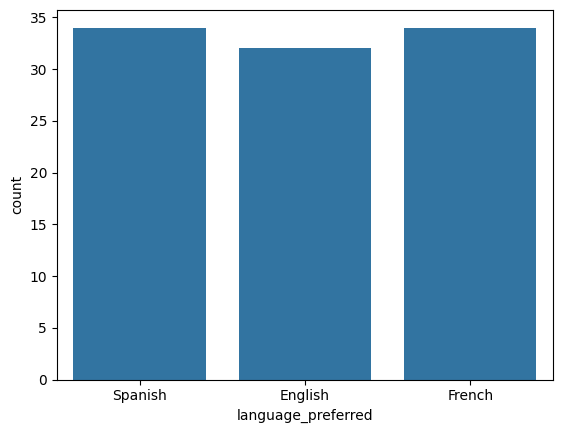

In [ ]:
# Visualizing the languages preferred on the pages
sns.countplot(data=data,x='language_preferred');

In [ ]:
# Checking the amount of users of each language
data['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

In [ ]:
# Checking the percentage of users in each language
data['language_preferred'].value_counts(normalize=True)

language_preferred
Spanish    0.34
French     0.34
English    0.32
Name: proportion, dtype: float64

**Observations:**
* There are 3 unique values for languages (Spanish, English, and French).
* Spanish and French both have 34 users comprising 34% of users each.
* English has 32 users comprising 32% of users.

### Bivariate Analysis

#### Landing page and Time spent

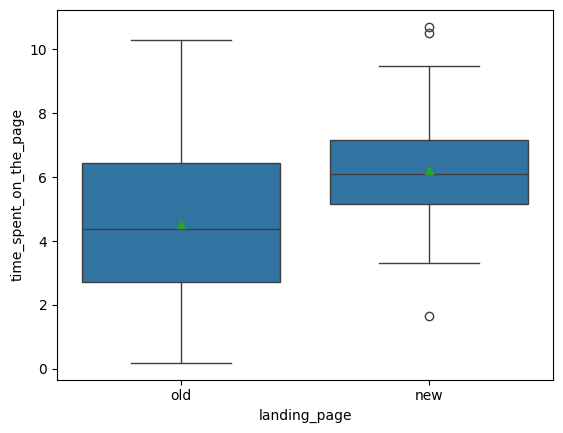

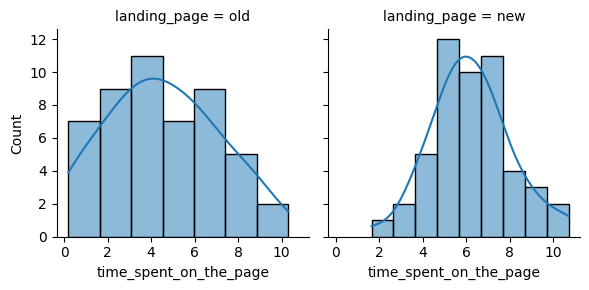

In [ ]:
# Visual on correlation between time spent on the page and landing page
sns.boxplot(data=data,x='landing_page',y='time_spent_on_the_page',showmeans=True)
plt.show()
g = sns.FacetGrid(data, col="landing_page")
g.map(sns.histplot, "time_spent_on_the_page",kde=True);

**Observations:**
* On average users spend more time on the new page (about 6 minutes) than the old (a little over 4 minutes).
* The old landing page is slightly right skewed. 50% of users in the old page spend between 3 and 6 minutes.
* The new landing page has a few outliers on both ends and is almost of symmetrical distribution. 50% of users in this page spend between 5 and 7 minutes.

#### Landing page and Converted

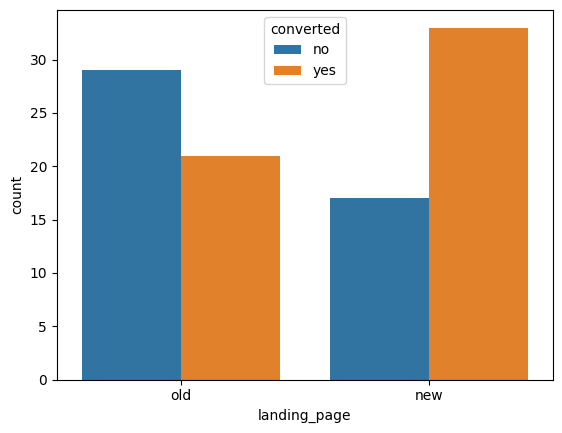

In [ ]:
# Visual on correlation between landing page and converted
sns.countplot(data=data,x='landing_page',hue='converted');

In [ ]:
# To create a dataset where only the rows that contain old are included from the landing page column
old_page=data[data['landing_page']=='old']

# Getting the conversion rate of users in the old landing page
old_page['converted'].value_counts(normalize=True)

converted
no     0.58
yes    0.42
Name: proportion, dtype: float64

In [ ]:
# To create a dataset where only the rows that contain new are included from from the landing page column
new_page=data[data['landing_page']=='new']

# Getting the conversion percentage of users in the new landing page
new_page['converted'].value_counts(normalize=True)

converted
yes    0.66
no     0.34
Name: proportion, dtype: float64

**Observations:**
* More users from the new landing page subscribe to the news website.
* Users in the old landing page are less likely to subscribe.
* 66% of users in the new landing page subscribed, while only 42% of users in the old landing page subscribed.

#### Converted and Time spent

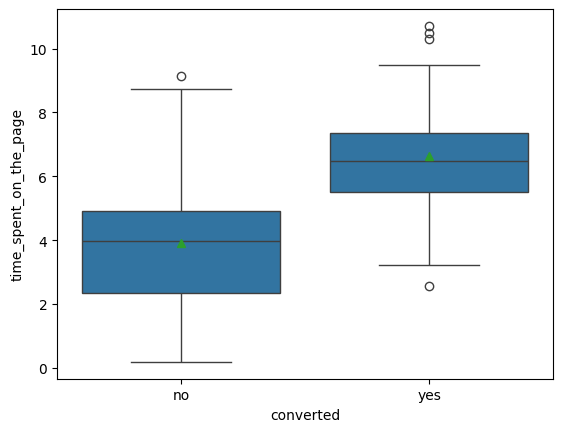

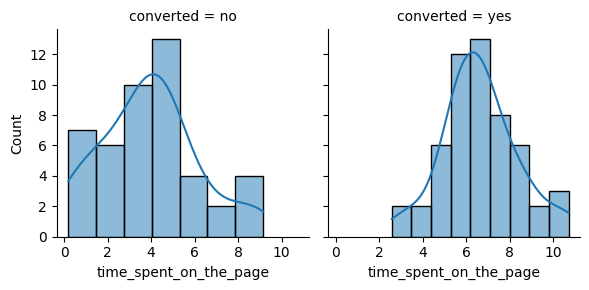

In [ ]:
# Visual on correlation between converted users and time spent on the landing page
sns.boxplot(data=data,x='converted',y='time_spent_on_the_page',showmeans=True)
plt.show()
g = sns.FacetGrid(data, col="converted")
g.map(sns.histplot, "time_spent_on_the_page",kde=True);

**Observations:**
* On average converted users spend about 7 minutes on the page and not converted spend around 4 minutes.
* There is an outlier on the upper whisker on not converted users. However, there are a few outliers on both ends of the converted users boxplot.
* Converted users spend at least 3 minutes and at most 9 minutes with a few outliers on around 10 minutes.
* Not converted users spend between less than one minute and 9 minutes on the page.

#### Time spent and Language preferred

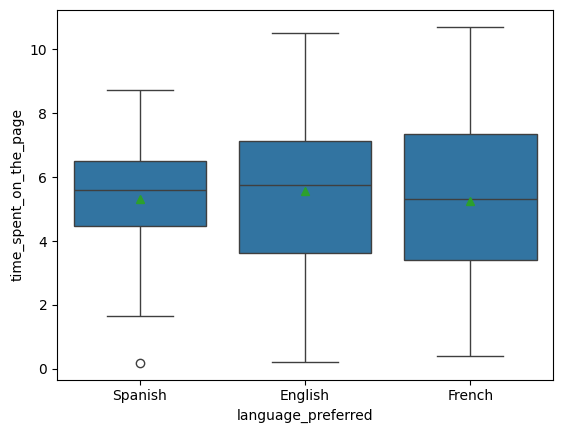

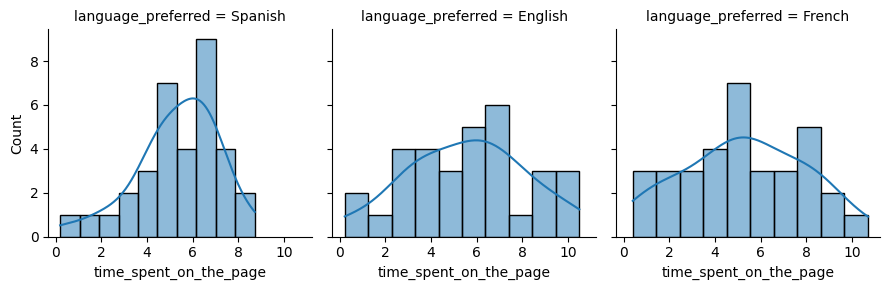

In [ ]:
# Visual on correlation between time spent on the page and language preferred
sns.boxplot(data=data,x='language_preferred',y='time_spent_on_the_page',showmeans=True)
plt.show()
g = sns.FacetGrid(data, col='language_preferred')
g.map(sns.histplot, 'time_spent_on_the_page',kde=True,bins=10);

**Observations:**
* The mean and median of all 3 languages are about 5 to 6 minutes spent on the page.
* Spanish users has one outlier on the lower end and is left skewed. Spanish users spend between 2 to 9 minutes on the page. 50% of Spanish users spend between 4 and 7 minutes.
* French users spend a bit longer on the page than users of the other languages, but have a slightly lower use average.
* English and French users have a similar time spent on the website with English having a slightly higher average time.

#### Landing page and Language preferred

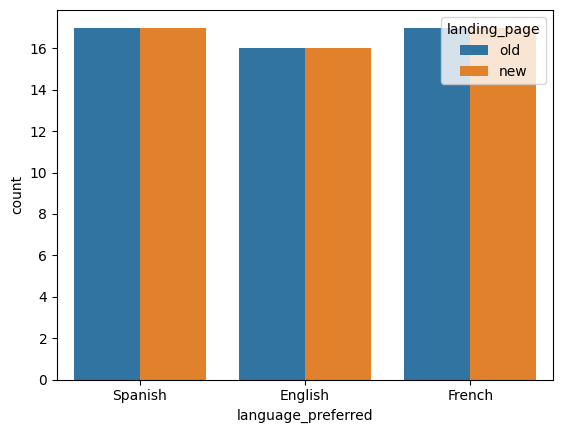

In [ ]:
# Visual between landing page and language preferred
sns.countplot(data=data, hue='landing_page', x='language_preferred');

**Observations:**
* Both the old and new landing pages have the same amount of users of each language preferred.

#### Language preferred and Converted users

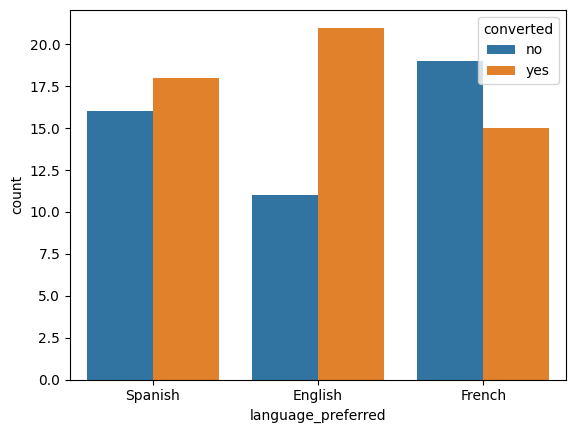

In [ ]:
# Visual between language preferred and landing page
sns.countplot(data=data, hue='converted', x='language_preferred');

**Observations:**
* French users are the only ones that have a higher amount of not converted users than subscribers.
* English has a significantly higher amount of converted users compared to Spanish users.

#### Language preferred, Converted, and Landing page

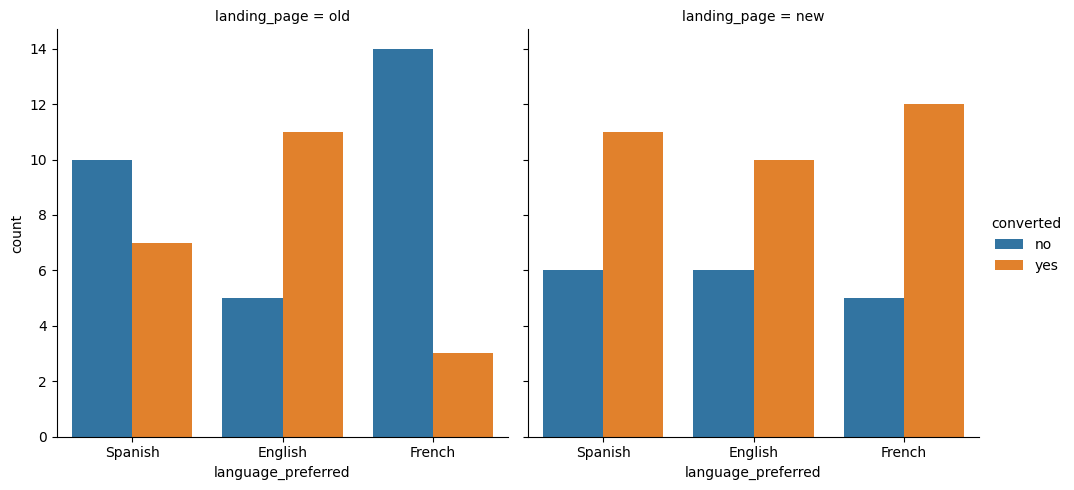

In [ ]:
# Comparing the above graph including landing page
sns.catplot(data=data, hue='converted', x='language_preferred',col='landing_page',kind='count');

**Observations:**
* English users are more likely to convert on either page.
* All users are likely to convert on the new landing page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

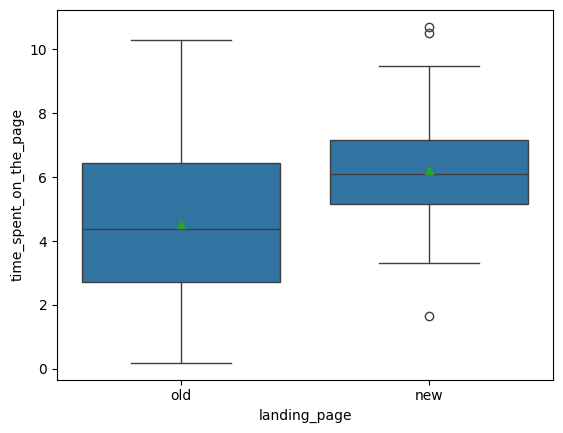

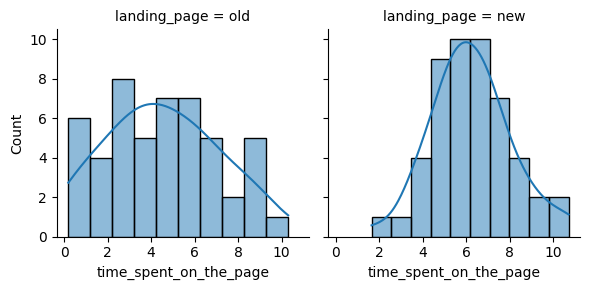

In [ ]:
# Visual between time spent and landing page
sns.boxplot(data=data,x='landing_page',y='time_spent_on_the_page',showmeans=True)
plt.show()
g = sns.FacetGrid(data, col="landing_page")
g.map(sns.histplot, "time_spent_on_the_page",kde=True, bins=10);

**Observations:**
* The old landing page is slightly right skewed. 50% of users spend between 3 and 6 minutes. The median time that users in the old page spend is a little more than 4 minutes.
* The new landing page has a few outliers on both ends. 50% percent of the users spend between 5 and 7 minutes on the page. The median of time spent on the page by users on the new page is around 6 minutes.

### Step 1: Define null and alternate hypotheses

Null hypothesis: The mean time spent on both landing pages is equal.
$H_0:\mu_1=\mu_2$

Alternate hypothesis: The mean time spent on the new landing page ($\mu_1$)  is greater than the old landing page ($\mu_2$).
$H_a:\mu_1>\mu_2$

### Step 2: Select appropriate test


We have the following information from the data:
* Continuous data: Time (in minutes) is measured on a continuous scale.
* Normal distribution: By looking at the visuals, we can assume that it is normally distributed.
* Independent populations: The two samples are from two independent populations (new and old landing pages).
* Unknown population standard deviations: We will need to calculate standard deviations to calculate the p-value.
* Random sampling from the population.
* We are comparing means.
* One-tailed test: we are testing if time is greater on the new page than the old page.

**We will use a 2 sample independent t-test.**

### Step 3: Decide the significance level

We'll set the significance level (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
# Creating separate variables to store the new page and the old page information
new_page = data[data['landing_page']=='new']
old_page = data[data['landing_page']=='old']

In [ ]:
# Calculating the standard deviation for the time spent on the new page
new_page['time_spent_on_the_page'].std()

1.8170310387878263

In [ ]:
# Calculating the standard deviation for the time spent on the old page
old_page['time_spent_on_the_page'].std()

2.581974849306046

**Observations:**
* The standard deviations are unequal.
* Standard deviation for the time spent on the new page is 1.82 and 2.58 on the old page.

### Step 5: Calculate the p-value

In [ ]:
# Importing the function to calculate p-value
from scipy.stats import ttest_ind

# Finding the p-value
test_stat, p_value = ttest_ind(new_page['time_spent_on_the_page'], old_page['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is', str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with alpha ($\alpha$)

In [ ]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is much smaller (0.000139) than the significance level (alpha) of 5%, we reject the null hypothesis. We have enough statistical evidence to conclude that the mean time spent on the new page is greater than the mean time spent on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual analysis

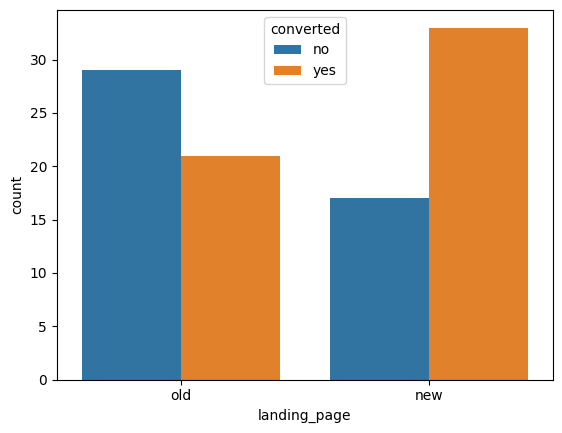

In [ ]:
# Visual on correlation between landing page and converted
sns.countplot(data=data,x='landing_page',hue='converted');

In [ ]:
# To create a dataset where only the rows that contain new are included from from the landing page column
new_page=data[data['landing_page']=='new']

# Getting the conversion percentage of users in the new landing page
new_page['converted'].value_counts(normalize=True)

converted
yes    0.66
no     0.34
Name: proportion, dtype: float64

In [ ]:
# To create a dataset where only the rows that contain old are included from the landing page column
old_page=data[data['landing_page']=='old']

# Getting the conversion percentage of users in the old landing page
old_page['converted'].value_counts(normalize=True)

converted
no     0.58
yes    0.42
Name: proportion, dtype: float64

In [ ]:
# Create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(data.landing_page,data.converted,margins=True)

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


**Observations:**
* 33 out of 50 users in the new landing page subscribed to the news portal. Comprising 66% of the users.
* 21 out of the 50 users of the old landing page converted to a subscriber. 42% of the old page users subscribed.

### Step 1: Define null and alternate hypothesis

Null hypothesis ($H_0):$ The proportion of subscribers in the new landing page is equal to the proportion of subscribers in the old landing page. p1 = p2

Alternate hypothesis ($H_a):$ The proportion of subscribers on the new landing page is greater than the old landing page. p1 > p2

### Step 2: Select appropriate test

The above hypothesis concerns proportions of 2 categorical variables (landing page and conversion). It is a binomally distributed proportion (users convert or don't).This is a one-tail test from 2 population proportions and 2 different populations where the sample size is greater than 30.

**We will use a 2 proportion z-test**

### Step 3: Decide the significance level

We'll set the significance level (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
# Calculating the number of converted users in the new page using the previously created variable of new_page
new_converted = new_page.converted.value_counts()['yes']

# Number of converted users in the old landing page using the previously created variable old_page
old_converted = old_page.converted.value_counts()['yes']

print('The numbers of converted users in the new and old landing pages are {0} and {1} respectively'.format(new_converted, old_converted))

# Total number of users in the new page
new_users = new_page.landing_page.value_counts()['new']

# Total number of users in the old page
old_users = old_page.landing_page.value_counts()['old']

print('The total numbers of new landing page users and old page users are {0} and {1} respectively'.format(new_users, old_users))

The numbers of converted users in the new and old landing pages are 33 and 21 respectively
The total numbers of new landing page users and old page users are 50 and 50 respectively


In [ ]:
print(f' The proportions of users in new and old landing pages are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of users in new and old landing pages are 0.66, 0.42 respectively


* The proportions are different. We will conduct the test to see if the difference is significant.

### Step 5: Calculate the p-value

In [ ]:
# Importing the necessary function
from statsmodels.stats.proportion import proportions_ztest

# Find the p-value using proportions_ztest
stat, pval = proportions_ztest([new_converted, old_converted] , [new_users, old_users], alternative = 'larger')

# Print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with alpha ($\alpha$)

In [ ]:
# Printing the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is less than the significance level (0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of converted users is greater in the new page than the old page.

## 3. Are the conversion and preferred language independent or related?

### Visual analysis

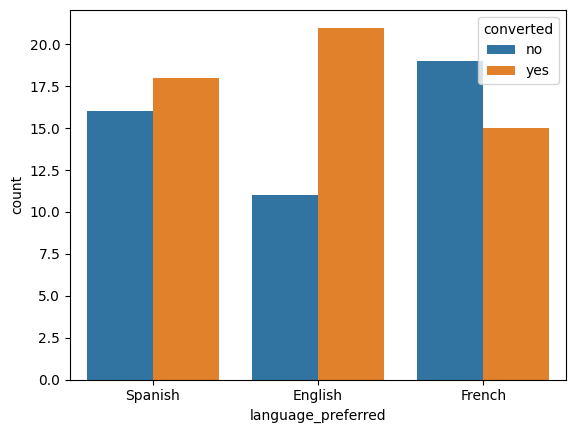

In [ ]:
# Visual between language preferred and landing page
sns.countplot(data=data,hue='converted', x='language_preferred');

In [ ]:
# Create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(data.converted,data.language_preferred,margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


In [ ]:
# Looking at the percentages of the converted users with English as the preferred language
data[data['language_preferred']=='English'].converted.value_counts(normalize=True)

converted
yes    0.65625
no     0.34375
Name: proportion, dtype: float64

In [ ]:
# Looking at the percentages of the converted users with Spanish as the preferred language
data[data['language_preferred']=='Spanish'].converted.value_counts(normalize=True)

converted
yes    0.529412
no     0.470588
Name: proportion, dtype: float64

In [ ]:
# Looking at the percentages of the converted users with French as the preferred language
data[data['language_preferred']=='French'].converted.value_counts(normalize=True)

converted
no     0.558824
yes    0.441176
Name: proportion, dtype: float64

* 54 out of the 100 users converted to a subscriber.
* English users have the highest conversion rate with 21 out of 32. 66% of the Ensligh users converted to a subscriber.
* French users have the lowest conversion rate with only 44% of French users converting, or 15 out of 34.
* Around 53% of the Spanish users subscribed to the website. Comprising 18 out of 34 users with Spanish as a preferred language.

### Step 1: Define null and alternate hypothesis

Null hypothesis ($H_0):$ Converted status and language preferred are independent of each other.

Alternate hypothesis ($H_a):$ Converted status and language preferred are dependent on each other.

### Step 2: Select appropriate test

The above formulated hypothesis concerns 2 categorical variables (language preferred and converted status). To test the dependence of two categorical variables we use a **chi-square test of independence**.

### Step 3: Decide the significance level

We'll set the significance level (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
# Creating a variable for the contingency table previously created
contingency_table = pd.crosstab(data.converted,data.language_preferred)
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


* We have created a contingency table with the counts of converted (yes or no) in rows and the counts for language preferred (English, French, and Spanish) in columns. We will use this table to conduct the test.

### Step 5: Calculate the p-value

In [ ]:
# Importing the required test function
from scipy.stats import chi2_contingency

# Calculate the test results and printing the values
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("The p-value is =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370837
The p-value is = 0.21298887487543447
Degrees of freedom = 2
Expected frequencies 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


### Step 6: Compare the p-value with alpha ($\alpha$)

In [ ]:
# Print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the level of significance (0.05), we fail to reject the null hypothesis. Hence, there isn't enough statistical evidence to say that converted status and language preferred are dependent on each other.

## 4. Is the time spent on the new page same for the different language users?

### Visual analysis

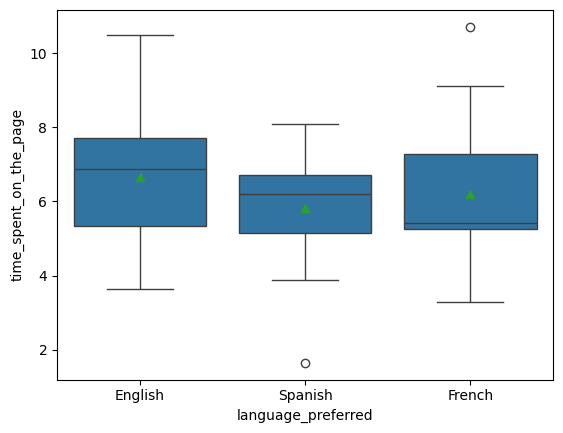

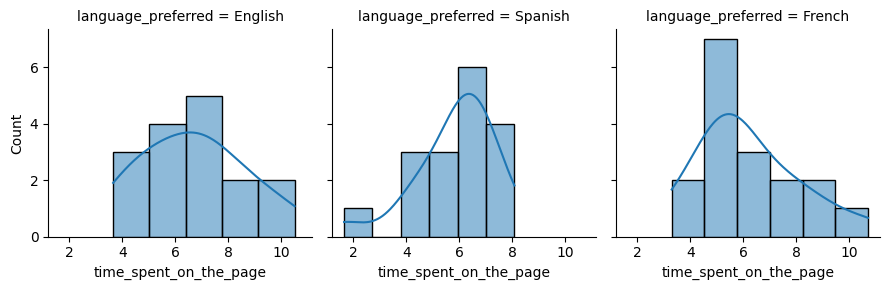

In [ ]:
# Visual on correlation between time spent on the new page (previously created variable) and language preferred
sns.boxplot(data=new_page,x='language_preferred',y='time_spent_on_the_page',showmeans=True)
plt.show()
g = sns.FacetGrid(new_page, col='language_preferred')
g.map(sns.histplot, 'time_spent_on_the_page',kde=True);

In [ ]:
# Calculating the average time spent by users depending on language preferred
print(new_page.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


* English users have a similar mean and median, spending an average of 6.66 minutes. They spend between around 4 and 11 minutes on the website.
* The distribution of Spanish users is left skewed. Spanish users spend an average of 5.84 minutes on the page. There is one outlier on the lower whisker, but most of the users spend between 4 and 8 minutes on the page.
* French users has a right skewed distribution. The average time spent is 6.2 minutes and the median is around 5.5 minutes. There is one outlier on the upper side.

### Step 1: Define null and alternate hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for language preferred English, French, and Spanish respectively.

$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

$H_a: $ At least one of the mean time spent is different from the other languages.

### Step 2: Select appropriate test

The above formulated hypothesis concerns the means of three populations. The variables that we are working with are one categorical and one quatitative. We will use **one way ANOVA** to test if there is any significant difference between them.

First, we will need to check for normality and equality of variances.

#### Shapiro-Wilk's test of normality

We will test the null hypothesis

$H_0:$ The time spent follows a normal distribution

against the alternative hypothesis

$H_a:$ The time spent does not not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# Import the required function
from scipy import stats

# Find the p-value
w, p_value = stats.shapiro(new_page['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


* Since the p-value is much larger than the significance level of 5%, we fail to reject the null hypothesis that it follows a normal distribution.

#### Levene's test for equality of variance

We will test the null hypothesis

$H_0$: All the population variances are equal

against the alternative hypothesis

$H_a$: At least one variance is different from the rest

In [ ]:
# Assumption 2: Homogeneity of Variance
# Import the required function
from scipy.stats import levene

# Find the p-value
statistic, p_value = stats.levene(new_page[new_page['language_preferred']=='English']['time_spent_on_the_page'],
                            new_page[new_page['language_preferred']=='French']['time_spent_on_the_page'],
                            new_page[new_page['language_preferred']=='Spanish']['time_spent_on_the_page'])
# Print the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


* Since the p-value is greater than the significance level of 5%, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

We'll set the significance level (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
# Creating separate variables to store the time spent on the new page with respect to the three languages preferred
time_english = new_page[new_page['language_preferred']=='English']['time_spent_on_the_page']
time_french = new_page[new_page['language_preferred']=='French']['time_spent_on_the_page']
time_spanish = new_page[new_page['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
# Import the required function
from scipy.stats import f_oneway

# Find the p-value
test_stat, p_value = f_oneway(time_english,time_french,time_spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with alpha ($\alpha$)

In [ ]:
# Printing the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the level of significance (0.05), we fail to reject the null hypothesis. Hence, there isn't enough statistical evidence to say that the mean time spent on the new page with respect to the language preferred is the same.

## Conclusion and Business Recommendations

### Conclusions

The data consists of 100 users of the E-news Express website. It is split evenly between 2 groups: Control group was served the old landing page, and Treatment group was served the new landing page.
* On average users spend more time on the new page (about 6 minutes) than on the old page (around 4 minutes). Showing more success on the new page than the old.
* Users in the new page spend between 3 and 9 minutes with a few outliers on both ends. The time in the new page is higher than the time spent in the old page (between less than 1 and 10 minutes).
* The maximum amount of time spent on the website is 10.71 minutes and a minumum of 0.19 minutes with an average of 5.38. These numbers seem low for the e-news platform.
* 54% of the users subscribed to the website which also seems low. The new landing page showed that users a more likely to convert.
* A total of 3 languages (English, French, and Spanish) were analyzed in the data. All 3 languages have a similar amount of users and average time spent on the page. However, it seems like Spanish users spend more time on the page than the others. Further analysis was done.
* At first glance English users seem more likely to convert to subscribers and further analysis was also done to check this.

### Recommendations

* As demonstrated on the t-test and proportions z-test. The news portal should fully implement the new landing page as it shows a more successful conversion rate and more time spent on the page.
* The company should continue to provide news on the 3 languages analyzed (English, French, and Spanish) and perhaps expand on other popular languages.
* The chi-square test of independence showed that there isn't enough statistical evidence to say that the converted status is dependent of language preferred. Therefore, the company should apply their resources into the new page since it has a higher conversion rate.
* At the same time, the average time spent on the page is similar regardless of the language preferred by the user. Once again, the time spent on the page is higher on the new than the old and doesn't seem to be related to the language preferred.
* Converted users spend more time on the page than not converted. In order to increase time spent on the website, the company should seek more subscribers by using the new page.
* The company could allow subscribed users to save and share articles.
* By providing a free subscription, the company could incite users to subscribe and limit the amount of articles that can be read without a subscription.
* Further data gathering and analysis can be done to determine what types of news users look for and read.

___